<a href="https://colab.research.google.com/github/c3rssei/datasciencecoursera/blob/master/week_3_nhanes_multivariate_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Practice notebook for multivariate analysis using NHANES data
This notebook will give you the opportunity to perform some multivariate analyses on your own
using the NHANES study data. These analyses are similar to what was done in the week 3
NHANES case study notebook.
You can enter your code into the cells that say “enter your code here”, and you can type re-
sponses to the questions into the cells that say “Type Markdown and Latex”.
Note that most of the code that you will need to write below is very similar to code that appears
in the case study notebook. You will need to edit code from that notebook in small ways to adapt
it to the prompts below.
To get started, we will use the same module imports and read the data in the same way as we
did in the case study:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
da = pd.read_csv("NHANES.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## 1.1 Question 1
Make a scatterplot showing the relationship between the first and second measurements of dias-
tolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients
among the first two systolic and the first two diastolic blood pressure measures.

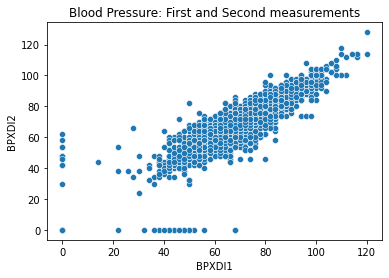

In [ ]:
sns.scatterplot(x='BPXDI1',y='BPXDI2',data=da)
plt.title("Blood Pressure: First and Second measurements")
plt.show()

In [ ]:
#Obtiene todas las filas para las columnas dadas y aplica el metodo corr por default pearson
da.loc[:,['BPXDI1','BPXDI2','BPXSY1','BPXSY2']].dropna().corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.317497,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.298392
BPXSY1,0.317497,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.298392,0.962287,1.000000


**Q1a**. How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

>La correlacion entre las presiones sanguineas sistolicas es 0.96 
lo cual indica que la relacion entre la toma repetida es muy fuerte.

>Con respecto a las presion diastolica es 0.88 lo cual es mas bajo que las presion sistolica pero aun asi sigue siendo una relacion bastante fuerte.

**Q2a.** Are the second systolic and second diastolic blood pressure measure more correlated or
less correlated than the first systolic and first diastolic blood pressure measure?

>Entre la primera medidad de presion diastolica y sistolica la relacion es mas alta que en la segunda medida.


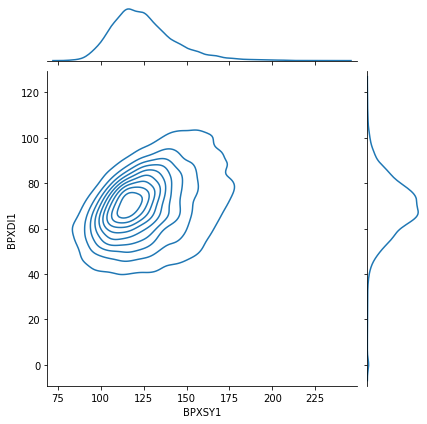

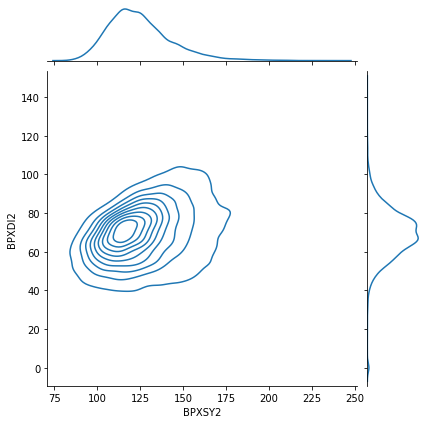

In [ ]:
ax=sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da)
ax1=sns.jointplot(x="BPXSY2", y="BPXDI2", kind='kde', data=da)



**1.2 Question 2** 

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure
measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

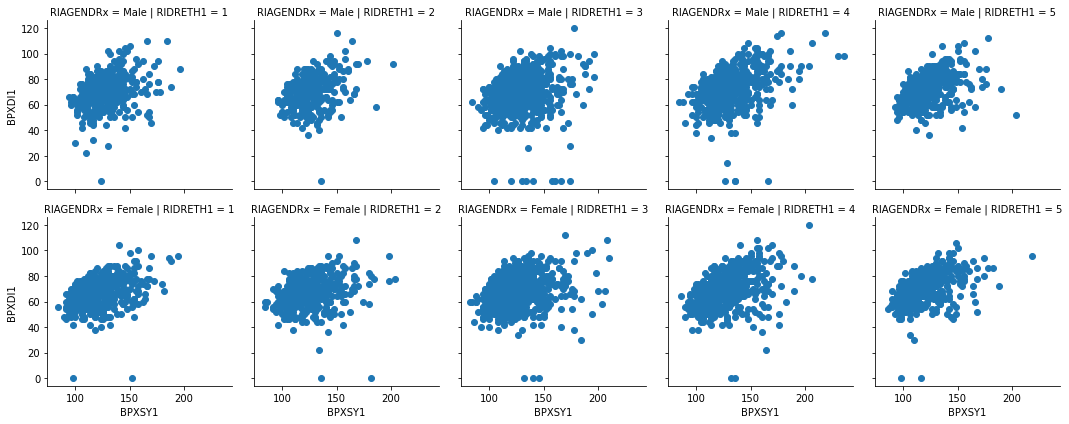

In [ ]:
da['RIAGENDRx']=da.RIAGENDR.replace({1:"Male",2:"Female"})
sns.FacetGrid(da,row='RIAGENDRx',col="RIDRETH1").map(plt.scatter,'BPXSY1','BPXDI1')

**Q3a.** Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.
>Podemos decir que la relacion de las dos presiones son similares en genero y etnia


##Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.


In [ ]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


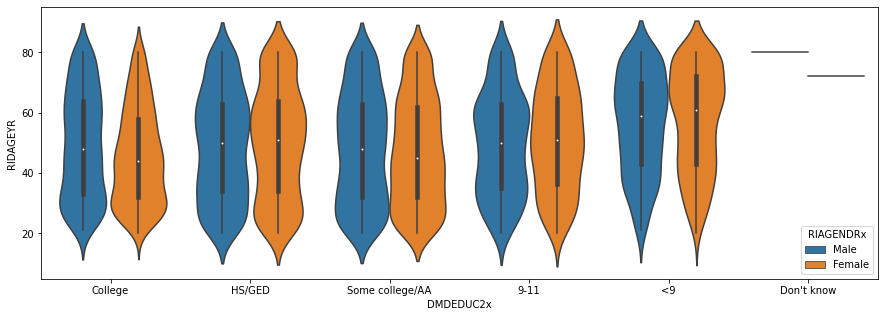

In [ ]:
plt.figure(figsize = (15,5))
sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, da.RIAGENDRx)

###Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also
stratify these plots by gender.

In [ ]:
da["RIDAGEYR"].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [ ]:
da["age_bin"]=pd.cut(da["RIDAGEYR"],bins=[18,30,40,50,60,80])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


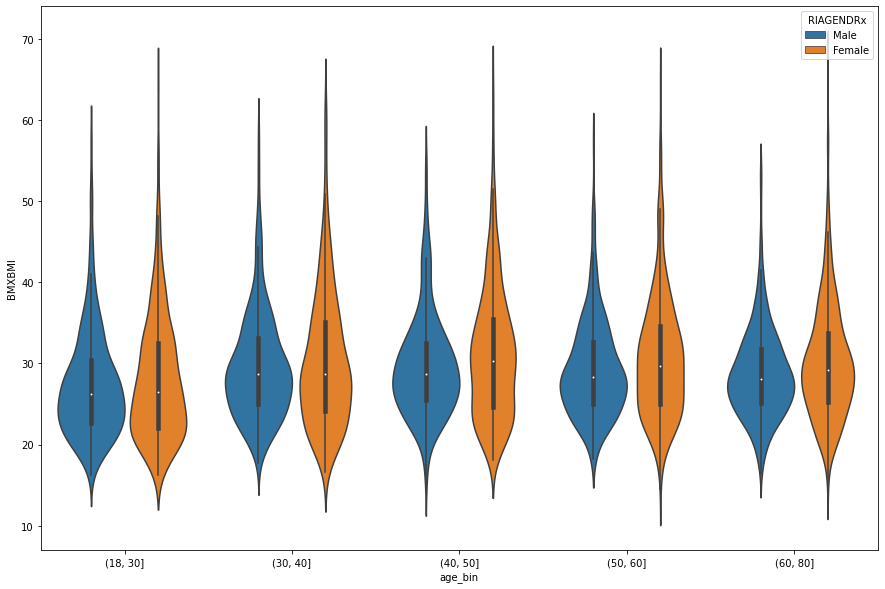

In [ ]:
plt.figure(figsize = (15,10))
sns.violinplot("age_bin","BMXBMI",hue="RIAGENDRx",data=da)



**Q5a**. Comment on the trends in BMI across the demographic groups.

>Las tendencias de los primeros grupos se encuentran sesgadas hacia la derecha, en los grupos de 40-60 en mujeres tiene un tendencia normal



##Question 5

Construct a frequency table for the joint distribution of ethnicity groups (RIDRETH1) and health-insurance status (HIQ210). Normalize the results so that the values within each ethnic group are proportions that sum to 1.


In [ ]:
da.groupby(['RIDRETH1','HIQ210']).size().fillna(0).unstack().apply(lambda z: z/z.sum(),axis=1)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,NaN
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516
